In [10]:
import sys

from random import choices
from collections import deque
from importlib import reload

from IPython import display
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import gym
import dqn

In [24]:
def train_agent(agent, env, episodes, echo = True, echo_freq = 10, save_frames = False, save_metrics = False):
    
    metrics = {'reward':[]}
    frames = []
    
    for episode in range(episodes):
        observation = env.reset()
        done = False
        agent.history.append(observation)
        
        
        while not done:
            action = agent.act()
            observation, done, reward, info = env.step(action)
            next_action = agent.act()
            agent.memorize(action, reward, observation, done)
            agent.learn()
            
            if save_metrics:
                metrics['reward'].append(reward)
            if save_frames:
                frames.append(env.render(mode='rgb_array'))
            
        if echo and (episode % echo_freq == 0):
            print('Episode {} completed'.format(episode))
            
    return metrics,frames

def render_frames(frames):
    
    img = plt.imshow(frames[0]) # only call this once
    for frame in frames[1:]:
        img.set_data(frame) # just update the data
        display.display(plt.gcf())
        display.clear_output(wait=True)
            

In [4]:
env = gym.make('Pong-v0')

In [27]:
agent = dqn.DDQN(env, hyperparams = {'nframes' : 4, 'batch_size':10})

In [ ]:
metrics, frames = train_agent(agent, env, episodes = 10)

Episode 0 completed


In [21]:
#Test memorize

train_frames = []
episodes = 2

for i in range(episodes):

    observation = env.reset()
    done=False
    agent.history.append(observation)
    counter = 0
    
       
    while not done:  
        action = agent.act()
        observation, reward, done, info = env.step(action)
        agent.memorize(action, reward, observation, done)  
        agent.learn()

        train_frames.append({
            'frame': env.render(mode='rgb_array'),
            'state': observation,
            'action': action,
            'reward': reward
            })
        
        if (counter%5 == 0):
            print('Episode {}, action {}'.format(i, counter))
        counter += 1



TypeError: learn() takes 1 positional argument but 5 were given

In [15]:
frame = env.reset()

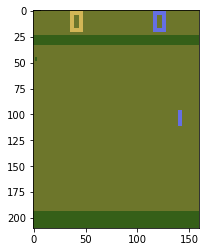

In [16]:
plt.imshow(frame)

In [26]:
reload(dqn)

<module 'dqn' from '/afs/cern.ch/work/p/paarruti/private/ml/dqn.py'>

In [24]:
help(gym)

Help on package gym:

NAME
    gym

PACKAGE CONTENTS
    gym (package)
    setup
    tests (package)

FILE
    (built-in)


